# **Welcome to the Notebook**

### Let's mount the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 :
Installing pyspark module

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=5c3f459e0f4f43a9fb0bde2ce9c3f4c47fd6e6520c3651c31d1fa6fcf4f03344
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


Importing the modules

In [39]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, asc, struct
import matplotlib.pyplot as plts

creating spark session

In [4]:
spark =SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 :
importing the *Listenings.csv* file:

In [5]:
listening_csv_path = '/content/drive/MyDrive/code/coursera projects/Data Analysis using Pyspark/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema', True).option('header',True).load(listening_csv_path)

let's check the data:

In [6]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [7]:
listening_df = listening_df.drop('date')

drop the null rows:

In [8]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [9]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema:

In [10]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe:

In [11]:
shape = (listening_df.count(),len(listening_df.columns))
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [12]:
q0 = listening_df.select('artist', 'track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [13]:
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [14]:
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count'))
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
| Pinky_von_Pout|  115|
|          jzshy|  111|
|        tombtch|  107|
|    sophstar007|  106|
|      djbXathia|  105|
|    Aims_rose18|  103|
|     nicolashaw|  102|
| duttywhineross|  101|
|          Lewzy|  100|
|        freekai|   99|
+---------------+-----+
only showing top 20 rows



**Query #3:**

find top 10 famous tracks

In [15]:
q3 = listening_df.select('artist','track').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()


+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna***

In [16]:
q4 = listening_df.select('artist','track').filter(listening_df.artist == 'Rihanna').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums

In [17]:
# prompt: find top 10 famous albums
q5 = listening_df.select('artist','album').groupby('artist','album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()


+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [18]:
# prompt: importing the genre.csv file:

genre_csv_path = '/content/drive/MyDrive/code/coursera projects/Data Analysis using Pyspark/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema', True).option('header',True).load(genre_csv_path)


let's check the data

In [19]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [20]:
data = listening_df.join(genre_df, how = 'inner', on = 'artist')
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [27]:
# prompt: find top 10 users who are fan of pop music

q6 = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q6.show()


+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



In [28]:
q6 = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [29]:
q7 = data.select('genre').groupby('genre').agg(count('genre').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [42]:
q8_1 = data.select('user_id','genre').groupby('user_id','genre').agg(count('*').alias('count'))
q8_1.show()

+---------------+--------------------+-----+
|        user_id|               genre|count|
+---------------+--------------------+-----+
|          _0015|     psychedelic pop|    3|
|        01Green|          Maty Noyes|    1|
|      01srainey|            Big Sean|    2|
|      03swalker|                soul|    4|
|        0502008|       Keys N Krates|    2|
|       07berobe|national socialis...|   14|
|       07berobe|        gothic metal|    8|
|          0rdos|              celtic|    1|
|     0xenolith0|       drum and bass|    1|
|10bobrevolution|         000 Fathers|    4|
| 11shadesofgrey|          electronic|    6|
| 11shadesofgrey|             baroque|    1|
|      1337fatal|                jazz|   14|
|        14M5K0T|                jazz|   70|
|          16-19| June Carter & Me...|    1|
|          16-19| Kanye West & Pau...|    1|
|   1888Franklin|               metal|   17|
|           1936|       Woody Jackson|    1|
|       19nick81|             minimal|   42|
|   1Chord

In [46]:
q8_2 = q8_1.groupby('user_id').agg(max(struct(col('count'),col('genre'))).alias('max')).orderBy(desc('max.count')).select(col('user_id'),col('max.genre'))
q8_2.show()

+--------------+--------------------+
|       user_id|               genre|
+--------------+--------------------+
|     mrsands91|                 r&b|
|     Benjiibop|                 r&b|
|     sbrooks91|                 r&b|
|       Pete557|                 r&b|
|      _Seichi_|                 r&b|
|     b00g13man| Associated Perfo...|
|       Kaigamo|                 r&b|
|   Kojobimpong|                jazz|
| dejectedxcore|            synthpop|
|   pussycatboi|                 r&b|
|       Munross| Associated Perfo...|
|     chazrules|                 r&b|
|     LizzieJoe|                jazz|
|lennyautomatik| Associated Perfo...|
|   NaomiWaters|                 r&b|
|   elizawright|                 r&b|
|        jhnhtt| Associated Perfo...|
|         oleuk|    Stephen Merchant|
|    dragula100|                rock|
|  WarrenPearce|                 r&b|
+--------------+--------------------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart

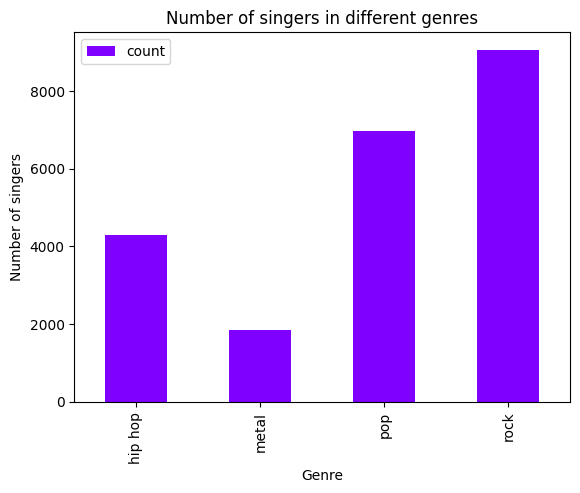

In [47]:
# prompt: find out how many pop,rock,metal and hip hop singers we have
# and then visulize it using bar chart
# q9 = genre_df.select('genre').filter(col('genre') == 'pop' | )

q9 = genre_df.select('genre').filter((col('genre') == 'pop') | (col('genre') == 'rock') | (col('genre') == 'metal') | (col('genre') == 'hip hop'))
q9_count = q9.groupby('genre').agg(count('genre').alias('count')).orderBy(asc('genre'))

# visualize it using bar chart
q9_count.toPandas().plot(kind='bar', x='genre', y='count', colormap='rainbow')
plts.xlabel('Genre')
plts.ylabel('Number of singers')
plts.title('Number of singers in different genres')
plts.show()


In [48]:
q9_count.collect()

[Row(genre='hip hop', count=4288),
 Row(genre='metal', count=1854),
 Row(genre='pop', count=6960),
 Row(genre='rock', count=9066)]